In [8]:
from BGN import *
from BGN_F import *
import matplotlib.pyplot as plt
import csv
import pandas as pd

bgn_c = BGN(1, 1, 130)
bgn_0 = BGN(0, 0, 0)
bgn_1 = BGN(1, 0, 0)
terminated = False

while not terminated:
    state, reward, terminated = bgn_0.step()
    state, reward, _ = bgn_c.step(mini_steps=20000)
    state, reward, _ = bgn_1.step()


KeyboardInterrupt: 

In [ ]:
bgn_F = BGN_F(1)
terminated = False
while not terminated:
    state, reward, terminated = bgn_F.step(action=[130, 300])

In [ ]:
plt.plot(1/np.log(bgn_0.sgi_sum)-0.089, label='healthy')
plt.plot(1/np.log(bgn_1.sgi_sum)-0.089, label='pd')
# plt.plot(1/np.log(bgn_c.sgi_sum), label='c')
plt.plot(1/np.log(bgn_F.sgi_sum)-0.089, label='F')
plt.legend()
plt.show()
print(np.average(1/np.log(bgn_0.sgi_sum)))

In [ ]:
from BGN_F import *
bgn_f = BGN_F(1, tmax=1200)
terminated = False
reward_sum = 0
while not terminated:
    state, reward, terminated = bgn_f.step(action=[130, 300], mini_steps=20000)
    reward_sum += reward

In [ ]:
plt.plot(np.log(bgn_0.new_state), label='healthy')
plt.plot(np.log(bgn_1.new_state), label='pd')
plt.plot(np.log(bgn_f.new_state), label='with stim')
plt.legend()
plt.show()

In [24]:
from BGN_F import *

bgn_1 = BGN_F(1, tmax = 1000)
bgn_0 = BGN_F(0, tmax = 1000)
bgn_f = BGN_F(1, tmax=1000)
bgn_1.reset()
bgn_0.reset()
bgn_f.reset()
terminated = False
while not terminated:
    state, reward, terminated, _, _ = bgn_1.step()
    state, reward, _, _, _ = bgn_0.step()
    state, reward, _, _, _ = bgn_f.step(1)
    


In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch
import antropy

bgn = bgn_f

# sgis = np.sum(bgn.sgis, axis=0)
# PB = np.average(np.sum(np.abs(np.fft.fft(bgn.vgi[:, -10000:]))[:, 12:31], axis=1))
# A = np.var(sgis)
# M = np.sqrt(np.var(np.diff(sgis))/A)
# C = np.sqrt(np.var(np.diff(np.diff(sgis)))/A) / M
# SampEn = antropy.sample_entropy(sgis)

A = np.average(np.var(bgn.sgis, axis=1))
M = np.average(np.sqrt(np.var(np.diff(bgn.sgis), axis=1)/A))
C = np.average(np.sqrt(np.var(np.diff(np.diff(bgn.sgis)), axis=1)/A) / M)
SampEn = np.average([antropy.sample_entropy(bgn.sgis[i]) for i in range(10)])
print(C)

# print(f'{PB}\n{A}\n{M}\n{C}\n{SampEn}')


1.144518404751572


In [1]:
from BGN_F import *
bgn_0 = BGN_F(0, tmax=1000)
bgn_1 = BGN_F(1, tmax=1000)
terminated = False
while not terminated:
    state_0, reward_0, terminated = bgn_0.step()
    state_1, reward_1, terminated = bgn_1.step()

In [2]:
bgn_F = BGN_F(1, tmax=1000)
terminated = False
while not terminated:
    state, reward, terminated = bgn_F.step((130, 300))

-0.047920449479198865
-0.07404450761570339
-0.04416535281193434


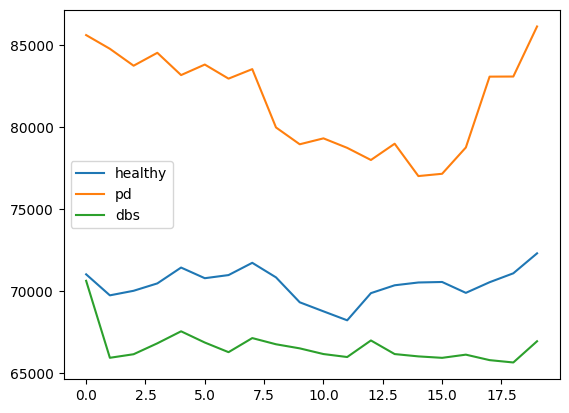

In [4]:
import matplotlib.pyplot as plt
plt.plot(bgn_0.sgi_sum, label='healthy')
plt.plot(bgn_1.sgi_sum, label='pd')
plt.plot(bgn_F.sgi_sum, label='dbs')
plt.legend()
print(bgn_0.reward)
print(bgn_1.reward)
print(bgn_F.reward)

In [6]:
from BGN_F import *
import matplotlib.pyplot as plt

bgn_0 = BGN_F(1)
bgn_f = BGN_F(1)
bgn_0.reset()
bgn_f.reset()
terminated = False
reward_0_sum = 0
reward_1_sum = 0
while not terminated:
    state, reward_0, terminated, _, _ = bgn_0.step()
    state, reward_1, terminated, _, _ = bgn_f.step(1)
    reward_0_sum += reward_0
    reward_1_sum += reward_1

print(reward_0_sum, reward_1_sum)

-0.4352651974251436 -0.26060350406436356


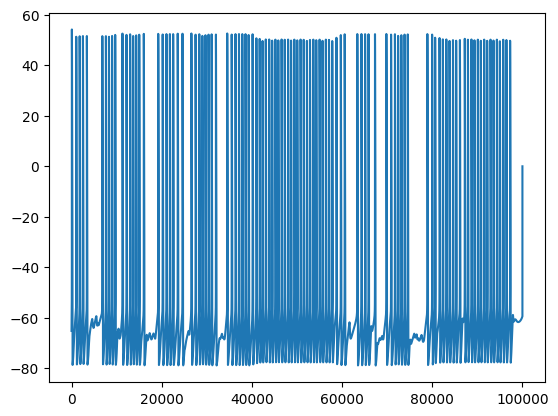

In [7]:
from BGN_F import *
import matplotlib.pyplot as plt
bgn_f = BGN_F(1)
bgn_f.reset()
bgn_f.step(0)
bgn_f.step(1)
bgn_f.step(0)
bgn_f.step(1)
plt.plot(bgn_f.vgi[0])